In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [10]:
df_diabetes=pd.read_csv('C:\\GitWorkspace\\Knn\\diabetes.csv')

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [16]:
df_diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A44F7F0>,
      dtype=object)

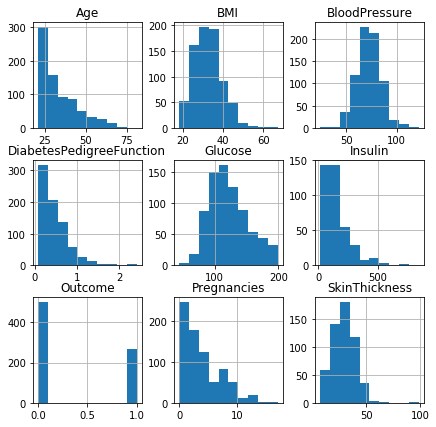

In [22]:
df_diabetes.hist(figsize=(7,7))

In [29]:
df_diabetes['Glucose'].fillna(df_diabetes['Glucose'].mean(),inplace=True)
df_diabetes['BloodPressure'].fillna(df_diabetes['BloodPressure'].mean(),inplace=True)

In [27]:
df_diabetes['BMI'].fillna(df_diabetes['BMI'].median(),inplace=True)
df_diabetes['Insulin'].fillna(df_diabetes['Insulin'].median(),inplace=True)
df_diabetes['SkinThickness'].fillna(df_diabetes['SkinThickness'].median(),inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B890278>,
      dtype=object)

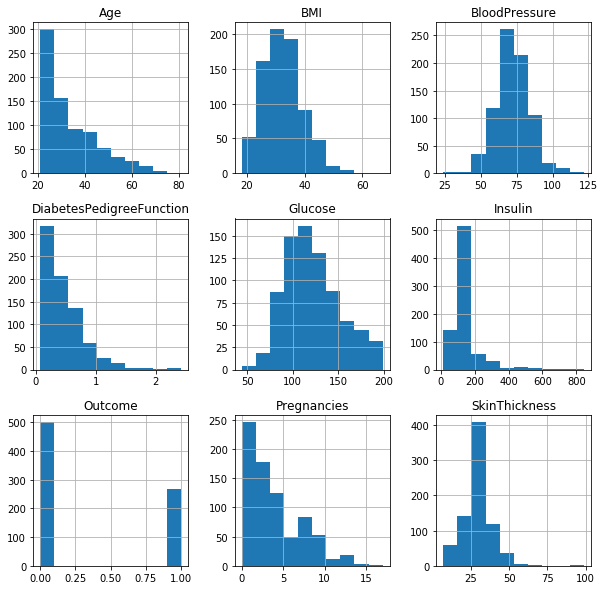

In [31]:
df_diabetes.hist(figsize=(10,10))

C:\Users\pavankumar.gopidesu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pavankumar.gopidesu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


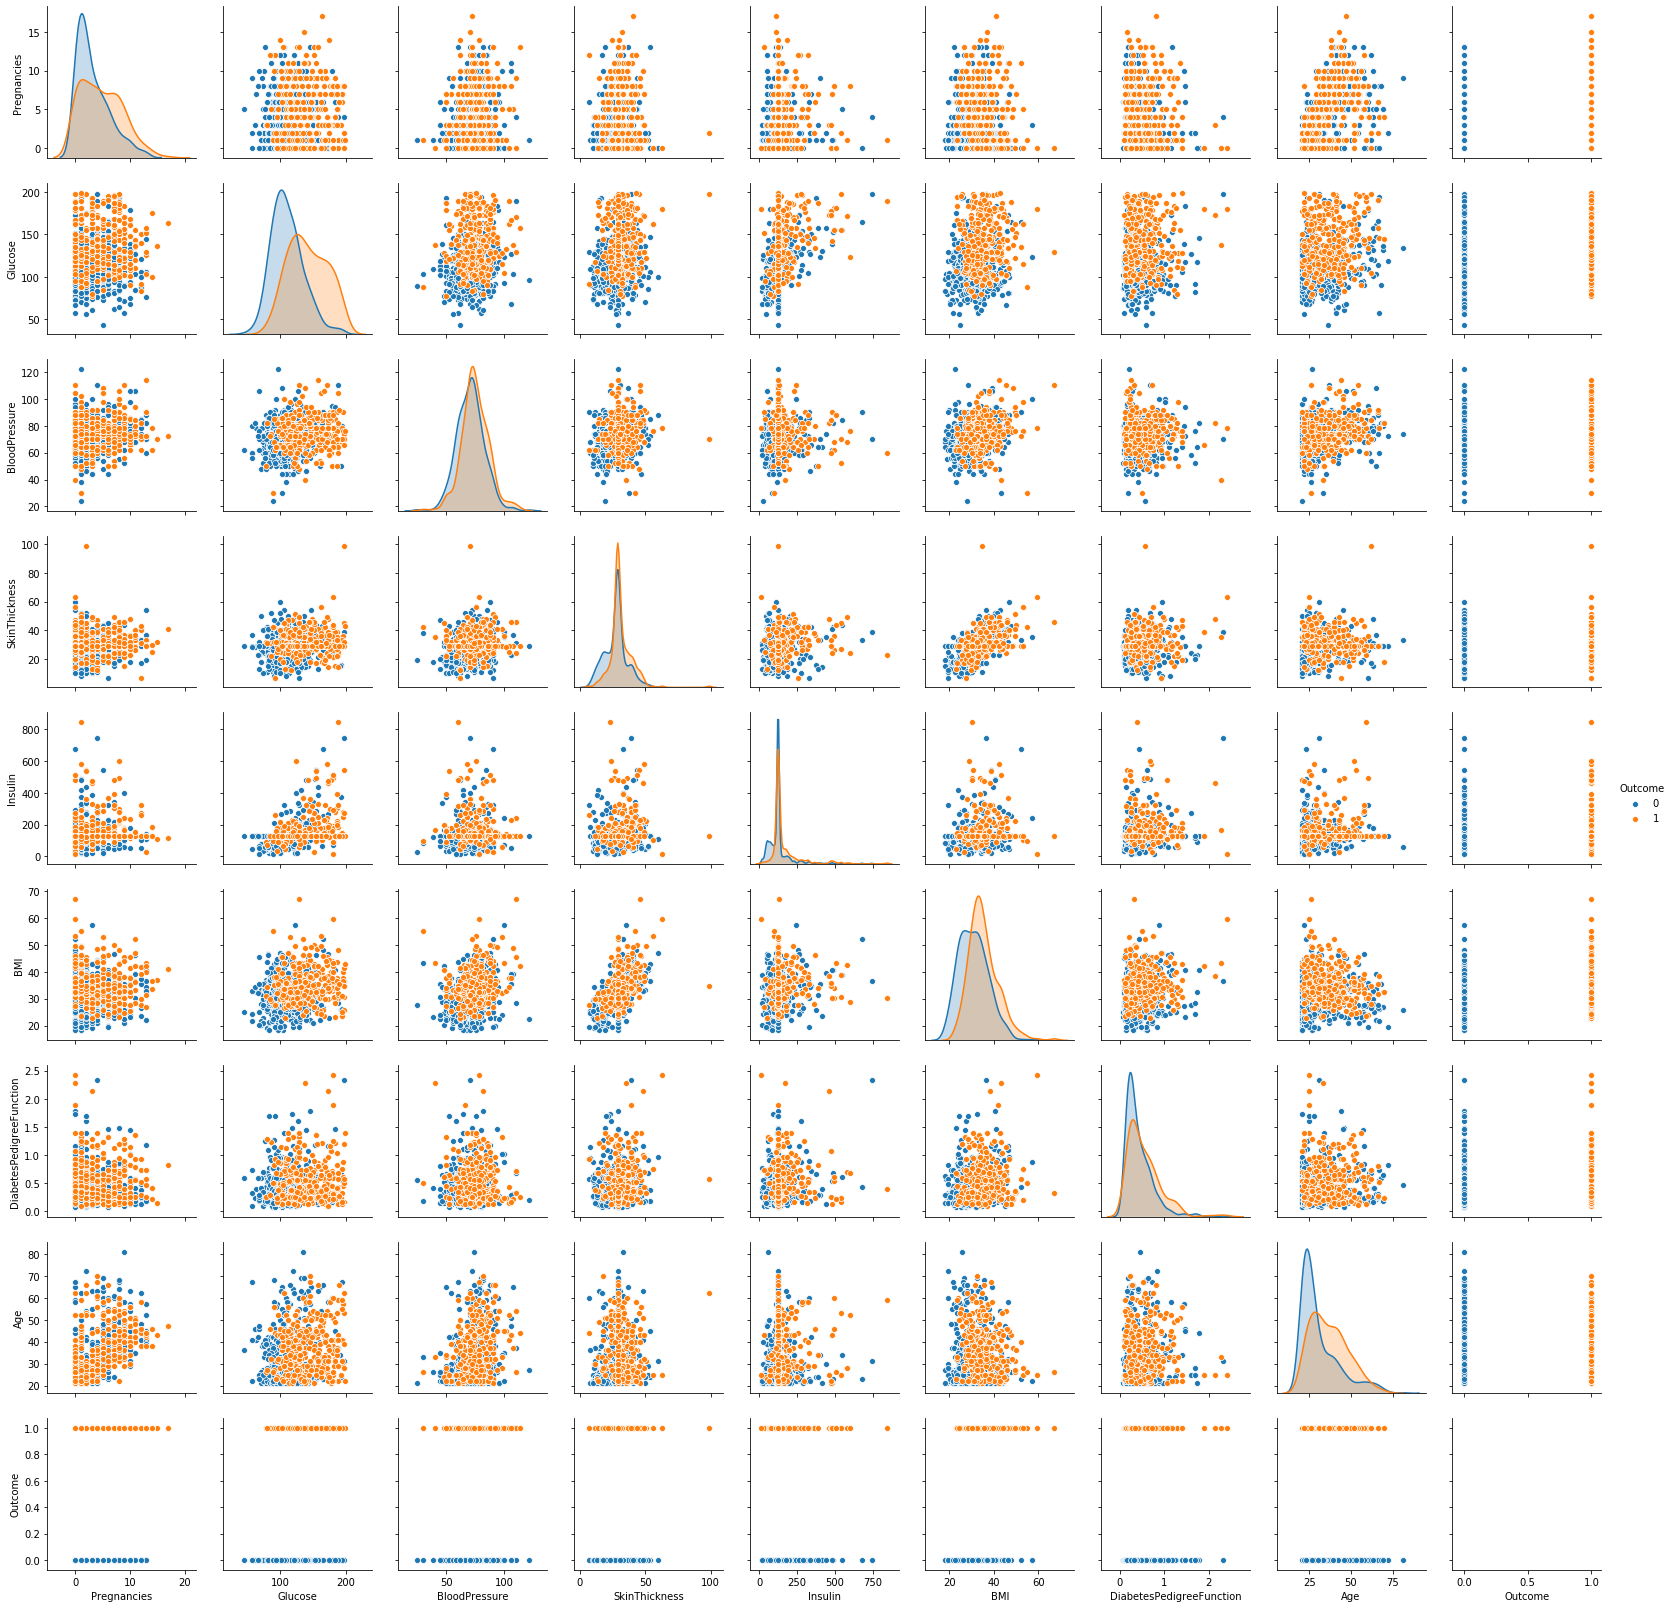

In [41]:
sns.pairplot(df_diabetes,hue="Outcome")

### Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale

In [42]:
from sklearn.preprocessing import StandardScaler

### The standard score of a sample `x` is calculated as:

###    z = (x - u) / s

### where `u` is the mean of the training samples or zero if `with_mean=False`,
### and `s` is the standard deviation of the training samples or one if`with_std=False`.

In [43]:
scaler=StandardScaler()

In [47]:
scaler.fit(df_diabetes.drop('Outcome',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
scaled_features = scaler.transform(df_diabetes.drop('Outcome',axis=1))

In [49]:
scaled_features

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [53]:
scaled_df=pd.DataFrame(scaled_features,columns=df_diabetes.columns[:-1])
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,x_test,Y_train,y_test=train_test_split(scaled_features,df_diabetes['Outcome'],test_size=.30)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [60]:
pred = knn.predict(x_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection  import cross_val_score

In [62]:
print(confusion_matrix(y_test,pred))

[[123  43]
 [ 26  39]]


In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       166
           1       0.48      0.60      0.53        65

    accuracy                           0.70       231
   macro avg       0.65      0.67      0.66       231
weighted avg       0.73      0.70      0.71       231



### Let's go ahead and use the elbow method to pick a good K Value

In [120]:
Accuracy_rate=[]

for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaled_df,df_diabetes['Outcome'],cv=10)
    Accuracy_rate.append(score.mean())

In [129]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaled_df,df_diabetes['Outcome'],cv=10)
    error_rate.append(1-score.mean())


In [130]:
error_rate = []


for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

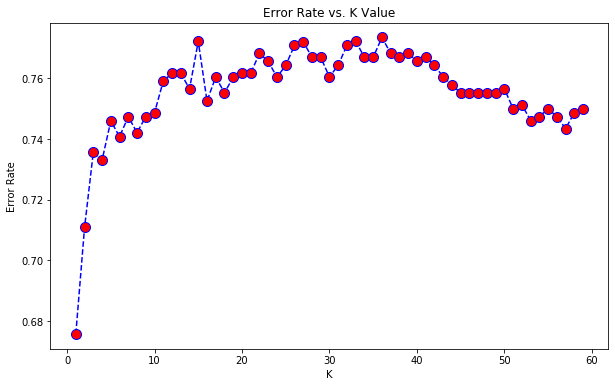

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))

plt.plot(range(1,60),Accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

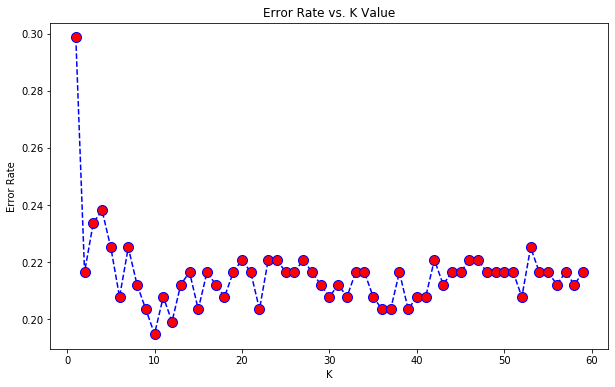

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))

plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [143]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)

In [144]:
print(confusion_matrix(y_test,pred))

[[140  26]
 [ 21  44]]


In [145]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       166
           1       0.63      0.68      0.65        65

    accuracy                           0.80       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.80      0.80      0.80       231



In [146]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

0.7601482854494903

In [147]:
knn.score(x_test,y_test)

0.7965367965367965